<a href="https://colab.research.google.com/github/JakeOh/202205_itw_bd34/blob/main/ml06_regression_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 준비

In [2]:
# fish 데이터 셋
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [3]:
fish = pd.read_csv(fish_csv)

In [4]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


물고기(Perch, 농어)의 무게 예측

`Weight ~ Length + Diagonal + Height + Width`

In [6]:
# Perch(농어) 부분집합
perch = fish[fish.Species == 'Perch']

In [7]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [8]:
perch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


In [12]:
pd.options.display.max_rows = 8

In [13]:
perch[['Length', 'Diagonal', 'Height', 'Width']]

,Length,Diagonal,Height,Width
72,8.4,8.8,2.1120,1.4080
73,13.7,14.7,3.5280,1.9992
74,15.0,16.0,3.8240,2.4320
75,16.2,17.2,4.5924,2.6316
...,...,...,...,...
124,43.0,45.2,11.9328,7.2772
125,43.0,45.5,12.5125,7.4165
126,43.5,46.0,12.6040,8.1420
127,44.0,46.6,12.4888,7.5958


In [15]:
# 특성(features) 배열
X = perch.iloc[:, 2:].values.copy()

In [16]:
X[:4]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ],
       [16.2   , 17.2   ,  4.5924,  2.6316]])

In [19]:
# 타겟(target) 배열
y = perch['Weight'].values.copy()

In [20]:
y[:4]

array([ 5.9, 32. , 40. , 51.5])

# train/test split

In [21]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.25,
                                          random_state=42)

In [22]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 4), (14, 4), (42,), (14,))

# 1차항만 고려한 회귀

## KNN Regressor

In [23]:
knn = KNeighborsRegressor()  # KNN 회귀 모델 생성

In [24]:
knn.fit(X_tr, y_tr)  # 모델 훈련

KNeighborsRegressor()

In [25]:
tr_pred = knn.predict(X_tr)  # 훈련 셋 예측값

In [26]:
tr_pred[:4]

array([ 87.6, 123. ,  79.6,  70.6])

In [27]:
y_tr[:4]

array([ 85., 135.,  78.,  70.])

In [29]:
# 훈련 셋 평가 점수: MSE, R2 score
print('MSE:', mean_squared_error(y_tr, tr_pred))
print('r2:', r2_score(y_tr, tr_pred))

MSE: 2986.5723809523806
r2: 0.97579760182756


In [31]:
# 학습에 사용되지 않은 테스트 셋의 예측값.
te_pred = knn.predict(X_te)

In [32]:
te_pred

array([  60. ,   79.6,  248. ,  122. ,  130. ,  847. ,  311.4,  183.4,
        847. ,  118. , 1043. ,   60. ,  248. ,  248. ])

In [33]:
y_te

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [35]:
# 테스트 셋 평가 점수
print('MSE:', mean_squared_error(y_te, te_pred))
print('r2:', r2_score(y_te, te_pred))

MSE: 837.3100000000001
r2: 0.9916579819676246


테스트 셋에서의 평가 점수가 훈련 셋에서의 점수보다 좋음 -> 과소적합

## Linear Regression

$$
\hat{y} = w_0 + w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 + w_4 \times x_4
$$

In [36]:
lin_reg = LinearRegression()  # 선형 회귀 모델 생성

In [37]:
lin_reg.fit(X_tr, y_tr)  # 모델 훈련

LinearRegression()

In [38]:
lin_reg.intercept_  # 선형 회귀식에서 w0

-610.0275364260515

In [39]:
lin_reg.coef_  # 선형 회귀식에서 w1 ~ w4

array([-40.18338554,  47.80681727,  67.34086612,  35.34904264])

In [40]:
# 훈련 셋 예측값
tr_pred = lin_reg.predict(X_tr)

In [41]:
# 훈련 셋 평가 점수
print('MSE:', mean_squared_error(y_tr, tr_pred))
print('r2:', r2_score(y_tr, tr_pred))

MSE: 5340.176566753986
r2: 0.9567246116638569


In [42]:
# 테스트 셋 예측값
te_pred = lin_reg.predict(X_te)

In [43]:
# 테스트 셋 평가 점수
print('MSE:', mean_squared_error(y_te, te_pred))
print('r2', r2_score(y_te, te_pred))

MSE: 12140.410523504848
r2 0.8790465615990273


훈련 셋의 점수가 테스트 셋의 점수보다 좋음 -> 과대적합

# 2차항을 고려한 선형 회귀

$$
\hat{y} = w_0 + w_1 \times x_1 + \cdots + w_4 \times x_4 + w_5 \times {x_1}^2 + w_6 \times {x_2}^2 + w_7 \times x_1 x_2 + \cdots
$$

In [44]:
poly = PolynomialFeatures(include_bias=False)
# degree=2: 기본값. 2차항까지만 고려.
# interaction_only=False: 기본값. x1^2, x2^2, x1*x2, ... 등을 모두 추가.
#   True로 설정하면 제곱항들은 무시되고, interaction 항들만 추가됨.

In [45]:
result = poly.fit_transform(X_tr)

In [46]:
result[:2]

array([[ 19.6       ,  20.8       ,   5.1376    ,   3.0368    ,
        384.16      , 407.68      , 100.69696   ,  59.52128   ,
        432.64      , 106.86208   ,  63.16544   ,  26.39493376,
         15.60186368,   9.22215424],
       [ 22.        ,  23.5       ,   5.875     ,   3.525     ,
        484.        , 517.        , 129.25      ,  77.55      ,
        552.25      , 138.0625    ,  82.8375    ,  34.515625  ,
         20.709375  ,  12.425625  ]])

In [47]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [48]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)

In [49]:
result = poly.fit_transform(X_tr)

In [50]:
result[:2]

array([[ 19.6       ,  20.8       ,   5.1376    ,   3.0368    ,
        407.68      , 100.69696   ,  59.52128   , 106.86208   ,
         63.16544   ,  15.60186368],
       [ 22.        ,  23.5       ,   5.875     ,   3.525     ,
        517.        , 129.25      ,  77.55      , 138.0625    ,
         82.8375    ,  20.709375  ]])

In [51]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0 x1', 'x0 x2', 'x0 x3', 'x1 x2',
       'x1 x3', 'x2 x3'], dtype=object)

## 2차항 추가, Scaling 하지 않는 경우

In [52]:
poly = PolynomialFeatures(include_bias=False)  # 변환기(transformer) - fit, transform
lin_reg = LinearRegression()  # 예측기(estimator) - fit, predict, score
# 변환기화 예측기 연결된 파이프라인 -> 머신 러닝 모델
model = Pipeline([("poly", poly),
                  ("lin_reg", lin_reg)])

In [53]:
model.fit(X_tr, y_tr)  # 모델 훈련
# (1) poly.fit_transform(X_tr)  --> (2) lin_reg.fit(X_tr_trans, y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('lin_reg', LinearRegression())])

In [54]:
model['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [55]:
model['lin_reg'].coef_

array([ -50.78509594,  124.88041222, -226.27583652, -211.15974936,
        219.94801311, -378.27754255, -310.06984107,  301.69060933,
        155.92749428,  315.3374506 , -269.45161891,   24.76034853,
       -176.24019353,  126.39216926])

In [56]:
tr_pred = model.predict(X_tr)  # 훈련 셋 예측값
#  (1) poly.transform(X_tr)  -->  (2) lin_reg.predict(X_tr_trans)

In [57]:
tr_pred[:4]

array([ 86.22462498, 117.8371985 ,  65.36623277,  51.32036181])

In [58]:
y_tr[:4]

array([ 85., 135.,  78.,  70.])

In [59]:
# 훈련 셋 평가 점수
print('MSE:', mean_squared_error(y_tr, tr_pred))
print('r2:', r2_score(y_tr, tr_pred))

MSE: 986.5134830835684
r2: 0.9920055538341062


In [60]:
# 테스트 셋 예측
te_pred = model.predict(X_te)

In [61]:
# 테스트 셋 평가 점수
print('MSE:', mean_squared_error(y_te, te_pred))
print('r2:', r2_score(y_te, te_pred))

MSE: 5092.809112559572
r2: 0.9492609601552375


## 2차항 추가, Scaling 하는 경우

In [65]:
# 모델 생성
model = Pipeline([('poly', PolynomialFeatures(include_bias=False)),
                  ('scaler', StandardScaler()),
                  ('reg', LinearRegression())])

In [67]:
# 모델 훈련: 
# poly.fit_transform(X_tr) -> scaler.fit_transform(X_tr_p) -> reg.fit(X_tr_p_s, y_tr)
model.fit(X_tr, y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [68]:
# 훈련 셋 예측, 평가
# poly.transform(X_tr) -> scaler.transform(X_tr_p) -> reg.predict(X_tr_p_s)
tr_pred = model.predict(X_tr)
print('mse:', mean_squared_error(y_tr, tr_pred))
print('r2:', r2_score(y_tr, tr_pred))

mse: 986.5134830823616
r2: 0.9920055538341159


In [69]:
# 테스트 셋 예측, 평가
te_pred = model.predict(X_te)
print('mse:', mean_squared_error(y_te, te_pred))
print('r2:', r2_score(y_te, te_pred))

mse: 5092.809112554763
r2: 0.9492609601552854


# 5차항까지 추가, Scaling하는 경우

In [70]:
model = Pipeline([('poly', PolynomialFeatures(degree=5, include_bias=False)),
                  ('scaler', StandardScaler()),
                  ('reg', LinearRegression())])

In [71]:
model.fit(X_tr, y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [72]:
model['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2', 'x0^3', 'x0^2 x1',
       'x0^2 x2', 'x0^2 x3', 'x0 x1^2', 'x0 x1 x2', 'x0 x1 x3', 'x0 x2^2',
       'x0 x2 x3', 'x0 x3^2', 'x1^3', 'x1^2 x2', 'x1^2 x3', 'x1 x2^2',
       'x1 x2 x3', 'x1 x3^2', 'x2^3', 'x2^2 x3', 'x2 x3^2', 'x3^3',
       'x0^4', 'x0^3 x1', 'x0^3 x2', 'x0^3 x3', 'x0^2 x1^2', 'x0^2 x1 x2',
       'x0^2 x1 x3', 'x0^2 x2^2', 'x0^2 x2 x3', 'x0^2 x3^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1^2 x3', 'x0 x1 x2^2', 'x0 x1 x2 x3',
       'x0 x1 x3^2', 'x0 x2^3', 'x0 x2^2 x3', 'x0 x2 x3^2', 'x0 x3^3',
       'x1^4', 'x1^3 x2', 'x1^3 x3', 'x1^2 x2^2', 'x1^2 x2 x3',
       'x1^2 x3^2', 'x1 x2^3', 'x1 x2^2 x3', 'x1 x2 x3^2', 'x1 x3^3',
       'x2^4', 'x2^3 x3', 'x2^2 x3^2', 'x2 x3^3', 'x3^4', 'x0^5',
       'x0^4 x1', 'x0^4 x2', 'x0^4 x3', 'x0^3 x1^2', 'x0^3 x1 x2',
       'x0^3 x1 x3', 'x0^3 x2^2', 'x0^3 x2 x3', 'x0^3 x3^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2

In [73]:
model['reg'].coef_

array([ -133743.21143773,  -196099.10964875,   194549.30851684,
          25557.55907496,   831847.05444447,   243410.82627434,
        -790540.27537465,  -204934.16235738,   577307.10721961,
          31185.90278828,    65312.22122636,  -689008.34337861,
         654427.01492652,  -237250.88149414,  -281636.56846688,
        -635944.42974516,   267762.92287007,   479362.69557319,
        -684257.25954732,   149540.9080415 ,   225790.8099954 ,
        -376013.08755925,  -118282.35170492, -1506295.26165139,
        -425085.9424367 ,   371629.95158413,   348130.61825541,
        -273807.89599778,    50424.23204717, -1023225.68809509,
        1100902.01951553,   650412.73879288,  -394345.91057271,
        1283341.46831935,  -307155.45141552,  -443247.11078211,
         555682.07137427,  1057475.91653877,  -489359.41632248,
         362527.54219546,   809931.35776582,   286096.30016696,
         406795.47537258,  -197336.8940489 ,  -444740.05014186,
         279312.32291294,   693604.86399

In [74]:
tr_pred = model.predict(X_tr)
print('train mse:', mean_squared_error(y_tr, tr_pred))
print('train r2:', r2_score(y_tr, tr_pred))

train mse: 4.351506028418873e-17
train r2: 1.0


In [75]:
print(y_tr[:5])
print(tr_pred[:5])

[ 85. 135.  78.  70. 700.]
[ 85.         135.00000001  78.00000001  70.         700.        ]


In [76]:
te_pred = model.predict(X_te)
print('test mse:', mean_squared_error(y_te, te_pred))
print('test r2:', r2_score(y_te, te_pred))

test mse: 14199476.804941649
test r2: -140.46766616560245


5차항까지 고려했을 때 선형 회귀 모델은 과대적합이 너무 심한 모델.

-> 일반화 성능이 안 좋음.

# 규제가 없는 선형 회귀 - 과대적합

In [77]:
X = perch[['Length']].values.copy()
y = perch['Weight'].values.copy()

In [78]:
X.shape, y.shape

((56, 1), (56,))

In [79]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.25,
                                          random_state=42)

In [98]:
# 모델 생성
model = Pipeline([('poly', PolynomialFeatures(degree=1, include_bias=False)),
                  ('scaler', StandardScaler()),
                  ('reg', LinearRegression())])

In [99]:
# 모델 훈련
model.fit(X_tr, y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [100]:
model['reg'].coef_

array([340.55381311])

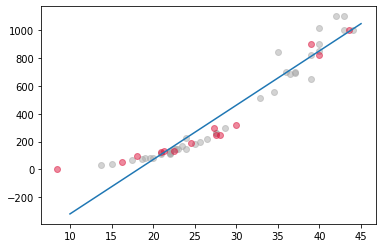

In [101]:
# 훈련 셋 산점도
plt.scatter(X_tr, y_tr, alpha=0.5, label='train', color='darkgray')

# 테스트 셋 산점도
plt.scatter(X_te, y_te, alpha=0.5, label='test', color='crimson')

# 선형 회귀 곡선 시각화
X_vals = np.arange(10, 45, 0.001).reshape((-1, 1))
y_vals = model.predict(X_vals)
plt.plot(X_vals, y_vals)

plt.show()